In [8]:
import pandas as pd
filepath = ('diabetes.csv')
data = pd.read_csv(filepath)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
data.head(1).T

,0
Pregnancies,6.000
Glucose,148.000
BloodPressure,72.000
SkinThickness,35.000
Insulin,0.000
BMI,33.600
DiabetesPedigreeFunction,0.627
Age,50.000
Outcome,1.000


In [10]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [11]:
data.drop(['Insulin'], axis=1, inplace=True)

In [12]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0


In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['Outcome']:
    data[col] = lb.fit_transform(data[col])

In [15]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [16]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'Outcome']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['Outcome']


In [17]:
X_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.448584,0.115713,0.433333


In [18]:
y_data

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

In [20]:
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [21]:
print(accuracy(y_data, y_pred))

0.8450520833333334


In [22]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

print(accuracy(y_data, y_pred))

1.0


In [23]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

print(accuracy(y_data, y_pred))

0.8151041666666666


In [24]:
score_list = list()

for k in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)

    y_pred = knn.predict(X_data.values)
    score = accuracy(y_data, y_pred)

    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

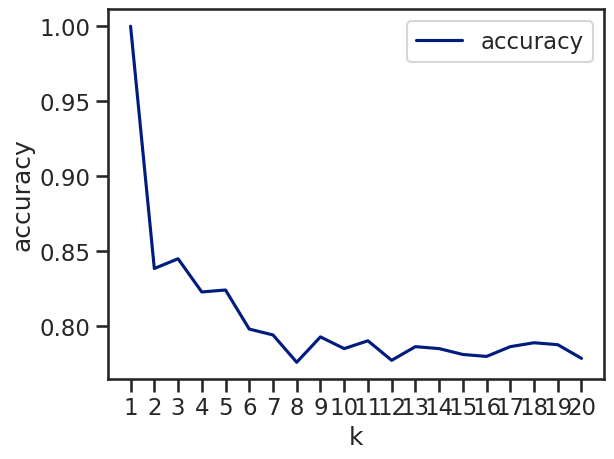

In [26]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));